In [2]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
from fastai.sgdr import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.plots import *

In [5]:
PATH = 'data/DogBreeds/'
arch = resnext101_64
size = 224
bs = 58


In [6]:
ls {PATH}

labels.csv      sample_submission.csv      test.zip  train.zip
labels.csv.zip  sample_submission.csv.zip  tmp/
models/         test/                      train/


In [7]:
labels_csv = f'{PATH}labels.csv'
n=len(list(open(labels_csv)))-1
valid_indx= get_cv_idxs(n)



In [8]:
n

10222

In [9]:
len(valid_indx)

2044

In [10]:
label_df = pd.read_csv(labels_csv)
label_df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
label_df.pivot_table(index='breed' , aggfunc=len).sort_values('id',ascending = False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [12]:
tfms = tfms_from_model(arch,size , aug_tfms=transforms_side_on , max_zoom=1.1)
data =ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',tfms = tfms, 
                                   val_idxs = valid_indx , suffix = '.jpg' , test_name = 'test',bs=bs)


In [13]:
files = PATH+data.trn_ds.fnames[0] 

In [14]:
files

'data/DogBreeds/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

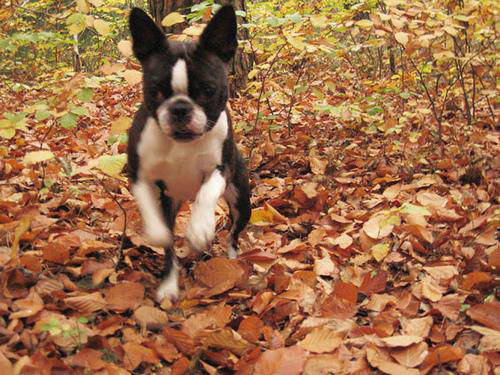

In [15]:
img = PIL.Image.open(files)
img

In [73]:
img.size

(500, 375)

In [16]:
size_d = { k:PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
size_d

{'train/000bec180eb18c7604dcecc8fe0dba07.jpg': (500, 375),
 'train/001cdf01b096e06d78e9e5112d419397.jpg': (500, 375),
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg': (400, 344),
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg': (500, 470),
 'train/002a283a315af96eaea0e28e7163b21b.jpg': (231, 227),
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg': (474, 500),
 'train/004396df1acd0f1247b740ca2b14616e.jpg': (375, 500),
 'train/00693b8bc2470375cc744a6391d397ec.jpg': (500, 299),
 'train/0075dc49dab4024d12fafe67074d8a81.jpg': (500, 332),
 'train/00792e341f3c6eb33663e415d0715370.jpg': (200, 192),
 'train/007b8a07882822475a4ce6581e70b1f8.jpg': (333, 500),
 'train/007ff9a78eba2aebb558afea3a51c469.jpg': (500, 375),
 'train/008887054b18ba3c7601792b6a453cc3.jpg': (160, 160),
 'train/008b1271ed1addaccf93783b39deab45.jpg': (500, 375),
 'train/009509be3ca7cce0ff9e37c8b09b1125.jpg': (400, 346),
 'train/0097c6242c6f3071762d9f85c3ef1b2f.jpg': (291, 210),
 'train/00a338a92e4e7bf543340dc849230e75.jpg': (200, 280

In [17]:
row_size , column_size = list(zip(*size_d.values()))

In [18]:
row_size = np.array(row_size)
column_size = np.array(column_size)

(array([3014., 5029.,   91.,   12.,    8.,    3.,   17.,    1.,    1.,    2.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

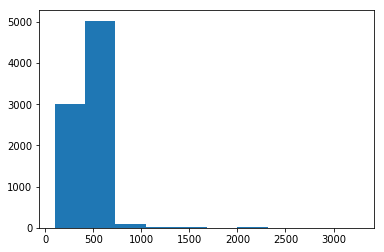

In [19]:
plt.hist(row_size)

(array([2713., 5267.,  131.,   21.,   15.,    8.,   17.,    4.,    0.,    2.]),
 array([ 102. ,  336.6,  571.2,  805.8, 1040.4, 1275. , 1509.6, 1744.2, 1978.8, 2213.4, 2448. ]),
 <a list of 10 Patch objects>)

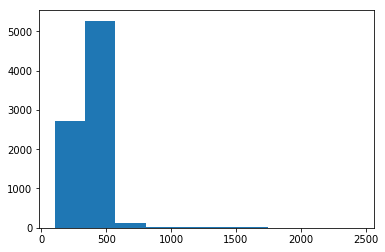

In [80]:
plt.hist(column_size)

In [20]:
len(data.trn_ds)

8178

In [21]:
len(data.test_ds)

10357

In [22]:
learn = ConvLearner.pretrained(arch , data , precompute = True)

In [23]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|█████████ | 127/141 [00:02<00:00, 48.52it/s, loss=10.3]


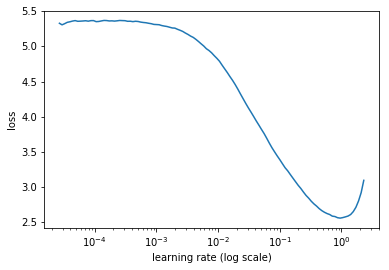

In [24]:
learn.sched.plot()

In [25]:
learn.fit(.01,5,cycle_len=1,)


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[0.      1.20081 0.64146 0.89744]                            
[1.      0.5793  0.38778 0.91804]                             
[2.      0.43293 0.31491 0.92522]                             
[3.      0.33661 0.28012 0.92905]                             
[4.      0.29179 0.26055 0.9324 ]                             



In [26]:
learn.save('224_pre')

In [34]:
learn.fit(.01,3,cycle_len=1,cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

[0.      0.24921 0.25783 0.92577]                             
[1.      0.22892 0.24652 0.92809]                             
[2.      0.18967 0.23669 0.92768]                             
[3.      0.15822 0.2356  0.92912]                             
[4.      0.16381 0.2366  0.92672]                             
[5.      0.14007 0.23106 0.93008]                             
[6.      0.12247 0.23492 0.92577]                             
[7.      0.10925 0.22896 0.9296 ]                             
[8.      0.08834 0.2255  0.9296 ]                              
[9.      0.08415 0.22565 0.92912]                              
[10.       0.08182  0.22586  0.92672]                          
[11.       0.07483  0.223    0.92912]                          
[12.       0.07498  0.22469  0.92864]                          



In [32]:
learn.load('224_pre')

In [30]:
learn.precomputee = False

In [31]:
learn.fit(.01,1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[0.      0.24861 0.25725 0.92522]                             



In [33]:
log_preds,y =learn.TTA()

In [34]:
log_preds

array([[-11.29804, -12.91889,  -7.37888, ...,  -7.87898, -11.55358, -10.36279],
       [ -9.24348, -10.7628 ,  -9.47978, ..., -10.16865,  -7.79595,  -8.12308],
       [-16.59909, -18.02693, -16.41965, ..., -12.74839, -10.50804, -13.06554],
       ...,
       [-11.10421, -10.80891,  -9.70077, ..., -10.67658,  -8.23844,  -9.25021],
       [-10.22783, -11.25523, -10.23695, ...,  -9.14783, -11.71921, -11.26147],
       [-14.14272, -14.49592, -13.06744, ..., -13.96839,  -8.06318, -15.04408]], dtype=float32)

In [35]:
probs = np.exp(log_preds)
metrics.log_loss(y,probs)
accuracy(log_preds,y)

0.9324853228962818

In [37]:
metrics.log_loss(y,probs)

0.26269504910325153

In [38]:
submission_csv = f'{PATH}sample_submission.csv'
submission_df = pd.read_csv(submission_csv)
submission_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [39]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [40]:
data.test_ds.fnames

['test/fd1a7be32f10493735555e62913c0841.jpg',
 'test/5273d42f02b4715cb93845205995ef64.jpg',
 'test/442057a3142f4d75a1023db363e2fb54.jpg',
 'test/fb03302b030afd122e0f4936c158f6c1.jpg',
 'test/511ca6e3539192aa5c8747bb697e0525.jpg',
 'test/2e60533a26e589f57fff34711c5ba73c.jpg',
 'test/27e4bd954bfe78f9e01338dc5108fadd.jpg',
 'test/591566259cbc95dd43b75d77b00aa7a5.jpg',
 'test/a51c2803972dff8c7fcc17f6b7eda64d.jpg',
 'test/9ace4c5cced4fb88678a5b0a9b3f3cf1.jpg',
 'test/0a4ef19459cd2100977b052de5f46231.jpg',
 'test/d1d5b398aaee58ef3d6d7cde20cf17ac.jpg',
 'test/5f93b0c2f5941449705b44ac56555740.jpg',
 'test/a8c328b54ad54952071ca471aaaf9bf8.jpg',
 'test/7b5f0257ec767a039aaf95246561163b.jpg',
 'test/01d5ffa4de01074483149bec0f6e5a59.jpg',
 'test/e12e6997c15c233c7b92209e08ff9d14.jpg',
 'test/b79c8019e5558042de2fd1105defec28.jpg',
 'test/cca524a4ee4fbbea4a867767377f2035.jpg',
 'test/873c14fc563d7d83e6de1253ab6ab67f.jpg',
 'test/99b7f212ca1c54282f01dfb98efbaea3.jpg',
 'test/cb7c8ef5b03d79feb9cf5416836

In [47]:
log_preds, y = learn.TTA(is_test=True)
probs = np.exp(log_preds , )

In [52]:
probs

array([[0.00003, 0.00015, 0.00001, ..., 0.00004, 0.00013, 0.00001],
       [0.00004, 0.00008, 0.00006, ..., 0.00028, 0.00014, 0.00011],
       [0.00001, 0.00006, 0.00001, ..., 0.00002, 0.00001, 0.00001],
       ...,
       [0.00363, 0.00248, 0.00213, ..., 0.00121, 0.01972, 0.00187],
       [0.26864, 0.     , 0.     , ..., 0.     , 0.     , 0.00001],
       [0.00018, 0.0005 , 0.00047, ..., 0.00027, 0.00248, 0.00009]], dtype=float32)

In [53]:
probs.shape

(10357, 120)

In [54]:
df= pd.DataFrame(probs)
df.columns = data.classes

In [56]:
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [57]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,fd1a7be32f10493735555e62913c0841,0.000030,0.000150,0.000014,0.000079,0.000011,0.000006,0.000032,0.000005,2.792049e-05,...,0.000639,0.000019,0.000027,0.000035,0.000021,1.153196e-05,0.000009,4.148683e-05,0.000127,0.000011
1,5273d42f02b4715cb93845205995ef64,0.000037,0.000080,0.000063,0.000071,0.000011,0.000007,0.000052,0.000037,3.268991e-06,...,0.000006,0.000004,0.000055,0.000048,0.000120,2.719752e-04,0.000006,2.767864e-04,0.000136,0.000109
2,442057a3142f4d75a1023db363e2fb54,0.000014,0.000057,0.000006,0.000060,0.000010,0.000052,0.000006,0.000011,3.332580e-04,...,0.000010,0.000020,0.000089,0.000292,0.000071,3.886272e-06,0.000012,2.413341e-05,0.000015,0.000009
3,fb03302b030afd122e0f4936c158f6c1,0.045503,0.000061,0.000067,0.000073,0.000113,0.000147,0.000072,0.000255,4.632049e-05,...,0.004282,0.000126,0.000210,0.000047,0.000053,6.031775e-05,0.000614,5.843677e-05,0.000166,0.020998
4,511ca6e3539192aa5c8747bb697e0525,0.000011,0.000001,0.000006,0.000001,0.000002,0.000003,0.000009,0.000001,9.369533e-07,...,0.000104,0.000005,0.000002,0.000001,0.000005,5.521739e-07,0.000048,9.873772e-07,0.000007,0.000084


In [60]:
submisssion = f'{PATH}subm/'
os.makedirs(submisssion,exist_ok=True)
df.to_csv(f'{submisssion}submisssion.gz',compression='gzip',index= False)

In [61]:
FileLink(f'{submisssion}submisssion.gz')

/home/ubuntu/fastai/courses/dl1/data/DogBreeds/subm/submisssion.gz

In [55]:
??df.insert

In [42]:
y

array([ 37,  49,  10, ..., 114,  51,   3])

In [43]:
log_preds

array([[-12.96105, -13.01604,  -9.4323 , ...,  -7.89392, -13.21599, -13.31082],
       [ -9.17083, -11.17445,  -9.65149, ...,  -9.9973 ,  -7.29164,  -8.01352],
       [-17.49295, -19.23956, -16.64461, ..., -13.74627, -10.57265, -15.21096],
       ...,
       [-10.58444, -12.23909, -10.57007, ...,  -9.56981, -10.62559,  -9.66505],
       [-14.22357, -12.3192 , -11.75064, ...,  -8.80464, -12.08437, -12.41431],
       [-17.77402, -15.02777, -13.74129, ..., -17.40674,  -9.86191, -15.21408]], dtype=float32)

In [46]:
prob = np.mean(np.exp(log_preds),0)
accuracy(np.mean((log_preds), 0), y)

AxisError: axis 1 is out of bounds for array of dimension 1

In [27]:
??ConvLearner.pretrained

In [25]:
??data.trn_ds.fnames

In [16]:
??ImageClassifierData.from_csv

In [7]:
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

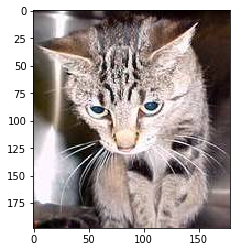

In [8]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [9]:
img.shape

(198, 179, 3)

In [10]:
sz=224

In [11]:
arch=resnet34
data=ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(.01,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.04447  0.02597  0.99072]                         
[ 1.       0.03893  0.02547  0.98926]                          
[ 2.       0.03402  0.02865  0.99219]                          



In [12]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
data.classes

['cats', 'dogs']

In [14]:
log_predict = learn.predict()
log_predict.shape

(2000, 2)

In [15]:
log_predict[:10]

array([[ -0.00001, -11.68292],
       [ -0.00768,  -4.87276],
       [ -0.00001, -11.31353],
       [ -0.00077,  -7.16528],
       [ -0.00001, -11.64073],
       [ -0.00001, -11.79195],
       [ -0.     , -12.55594],
       [ -0.00017,  -8.68614],
       [ -0.00004, -10.14065],
       [ -0.00001, -11.82786]], dtype=float32)

In [16]:
preds=np.argmax(log_predict,axis=1)
probs=np.exp(log_predict[:,1])


In [ ]:
def rand_by_mask(mask):return np.random.choice(np.where(mask)[0],4 ,replace = False) 
def rand_by_choice()

In [17]:
learn = ConvLearner.pretrained(arch,data,precompute = True)
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 299/360 [00:01<00:00, 155.15it/s, loss=0.427]


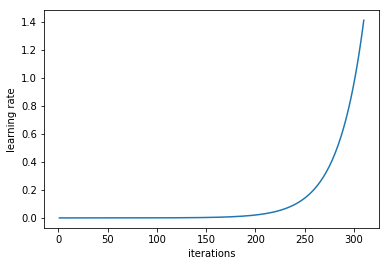

In [18]:
learn.sched.plot_lr()

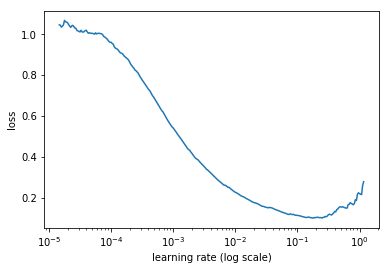

In [19]:
learn.sched.plot()

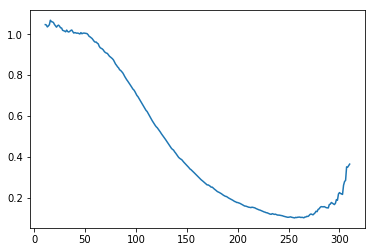

In [20]:
learn.sched.plot_loss()

In [21]:
tfms=tfms_from_model(resnet34,sz,aug_tfms=transforms_side_on,max_zoom=1.1)

In [30]:
def get_augs():
    data=ImageClassifierData.from_paths(PATH,bs=2,tfms=tfms,num_workers=1)
    x,_=next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]
    

In [31]:
??data.trn_ds.denorm

In [32]:
ims = np.stack([get_augs() for i in range(6)])

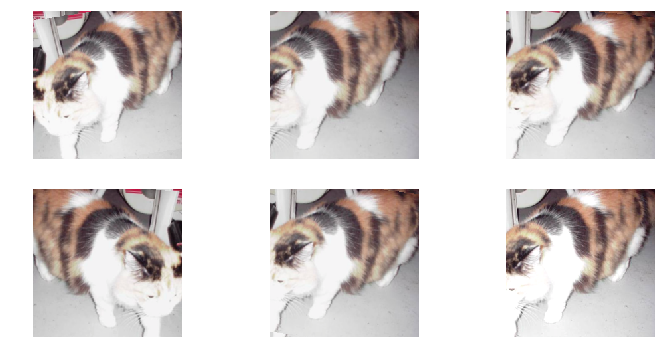

In [34]:
plots(ims,rows=2)